In [1]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator

# Load the CSV file containing Hindi text
file_path = r"C:\Users\soumy\Desktop\GITA ALL SHLOKS.csv"
data = pd.read_csv(file_path)

# Assuming the column name with Hindi text is 'Hindi'
reviews = data['Sanskrit']

# Initialize the Google Translator
translator = Translator()

# Function to analyze sentiment
def analyze_sentiment(review):
    try:
        # Translating the Hindi text to English using Google Translator
        translated = translator.translate(review, dest='en')
        blob = TextBlob(translated.text)
        polarity = blob.sentiment.polarity
    except Exception as e:
        print(f"Error translating text: {e}")
        polarity = 0  # Default to neutral if translation fails
    
    # Map polarity to human emotions
    if polarity > 0.8:
        sentiment = 'Joy'
    elif 0.6 < polarity <= 0.8:
        sentiment = 'Happiness'
    elif 0.4 < polarity <= 0.6:
        sentiment = 'Enjoyment'
    elif 0.2 < polarity <= 0.4:
        sentiment = 'Empathy'
    elif 0.0 < polarity <= 0.2:
        sentiment = 'Interest'
    elif -0.2 < polarity <= 0.0:
        sentiment = 'Calmness'
    elif -0.4 < polarity <= -0.2:
        sentiment = 'Sadness'
    elif -0.6 < polarity <= -0.4:
        sentiment = 'Fear'
    elif -0.8 < polarity <= -0.6:
        sentiment = 'Anger'
    elif polarity <= -0.8:
        sentiment = 'Disgust'
    else:
        sentiment = 'Neutral'
    
    return polarity, sentiment

# Apply sentiment analysis on the Hindi text
data['Sentiment_Polarity'], data['Sentiment_Label'] = zip(*reviews.apply(analyze_sentiment))

# Display the results
print(data.head())

# Save the results to a CSV file
output_file_path = 'sentimentresults-sanskrit.csv'
data.to_csv(output_file_path, index=False)

print(f"Sentiment analysis results saved to {output_file_path}")

   SL NO                                           Sanskrit  \
0      1  धृतराष्ट्र उवाच\nधर्मक्षेत्रे कुरुक्षेत्रे समव...   
1      2  प्रसंग - धृतराष्ट्र के पूछने पर सञ्जय कहते हैं...   
2      3  प्रसंग - द्रोणाचार्य के पास जाकर दुर्योधन ने ज...   
3      4   पाण्डव-सेनाकी व्यूहरचना दिखलाकर अब दुर्योधन त...   
4      5  धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान् । पुर...   

                                               Hindi  \
0  धृतराष्ट्र बोले- हे सञ्जय ! धर्मभूमि कुरुक्षेत...   
1  सञ्जय बोले- उस समय राजा दुर्योधन ने व्यूह\nरचन...   
2  हे आचार्य ! आपके बुद्धिमान् शिष्य द्रुपदपुत्र ...   
3  इस सेना में बड़े-बड़े धनुषों वाले तथा युद्ध मे...   
4   धृष्टकेतु और चेकितान तथा बलवान् काशिराज, पुरु...   

                                             English  Sentiment_Polarity  \
0  Dhratrastra said: Sañjaya, gathered on\nthe sa...              0.0000   
1  Sanjaya said: At that time, seeing the army\no...              0.0000   
2  Behold, Master, the mighty army of the sons of...    

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = 'sentimentresults-sanskrit.csv' 
data = pd.read_csv(file_path)

In [7]:
sentiment_counts = data['Sentiment_Label'].value_counts()

Text(0.5, 1.0, 'Sentiment Distribution (Pie Chart)')

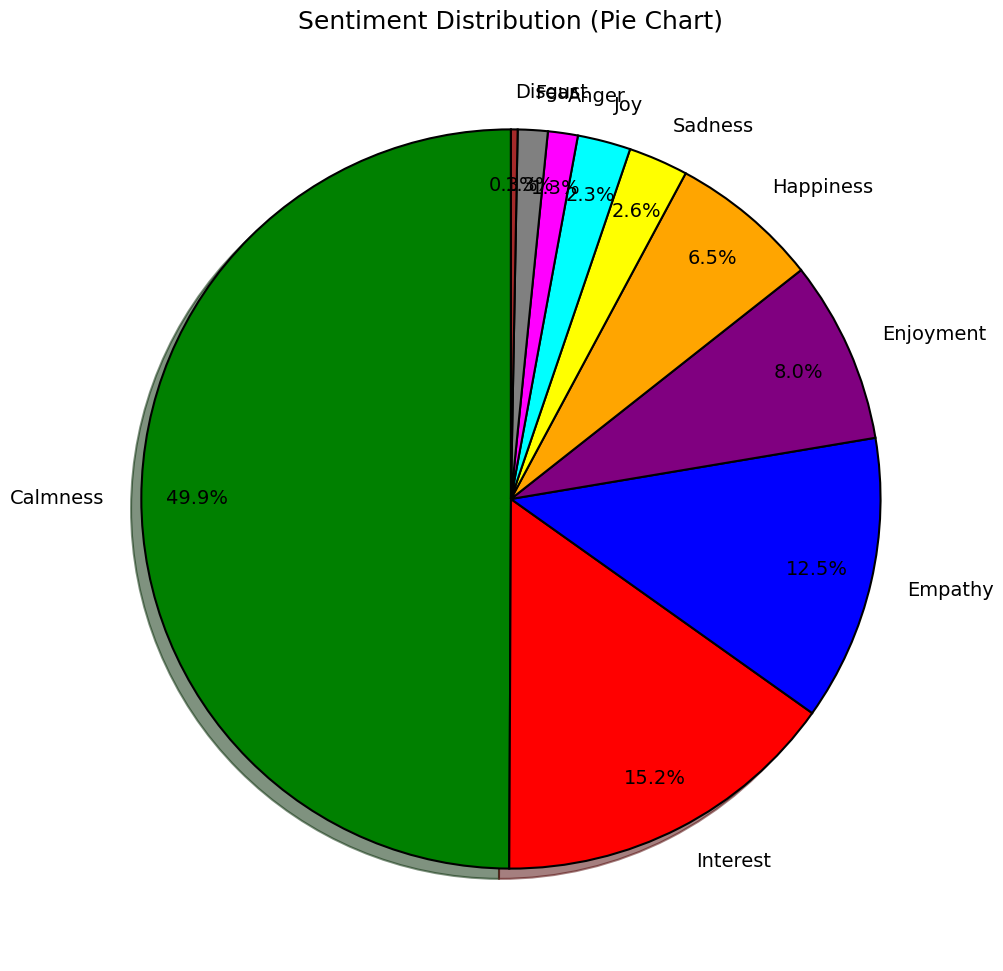

In [9]:
colors = ['green', 'red', 'blue', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'gray', 'brown']

# 1. Pie Chart
plt.figure(figsize=(12, 12))
sentiment_counts.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    shadow=True, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 14},  # Adjust text size for better readability
    pctdistance=0.85  # Position the percentage labels closer to the center
)

# Adjust label distance to prevent overlap
plt.gca().set_ylabel('')
plt.title('Sentiment Distribution (Pie Chart)', fontsize=18)

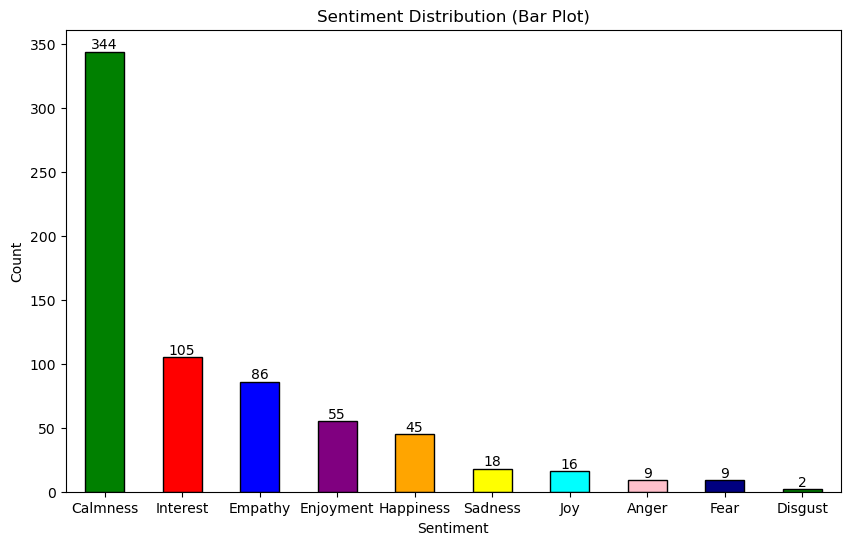

In [11]:
plt.figure(figsize=(10, 6))
bars = sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue','purple','orange','yellow','cyan','pink','navy'], edgecolor='black')
plt.title('Sentiment Distribution (Bar Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding count labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X position
             bar.get_height(),  # Y position
             round(bar.get_height()),  # The label (height of the bar)
             ha='center',  # Horizontal alignment
             va='bottom',  # Vertical alignment
             fontsize=10)  # Font size

plt.show()

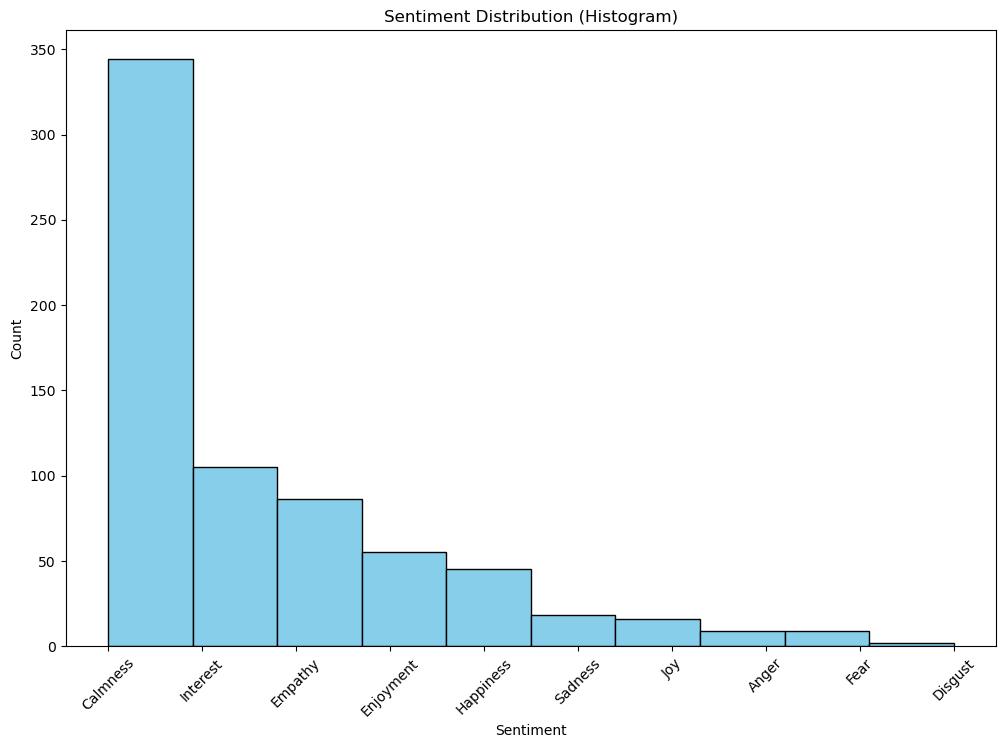

In [13]:
sentiment_map = {sentiment: idx for idx, sentiment in enumerate(sentiment_counts.index)}
data['Sentiment_Numeric'] = data['Sentiment_Label'].map(sentiment_map)

# Histogram
plt.figure(figsize=(12, 8))
plt.hist(data['Sentiment_Numeric'], bins=len(sentiment_counts), color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution (Histogram)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=range(len(sentiment_counts)), labels=sentiment_counts.index, rotation=45)
plt.show()

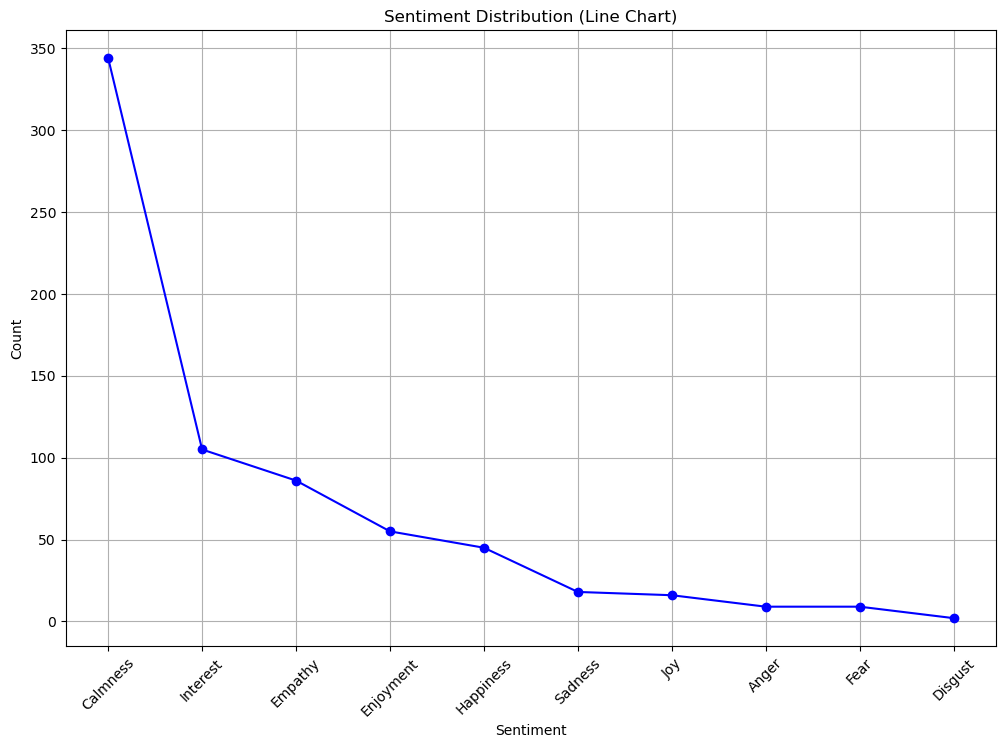

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(sentiment_counts.index, sentiment_counts.values, marker='o', linestyle='-', color='b')
plt.title('Sentiment Distribution (Line Chart)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

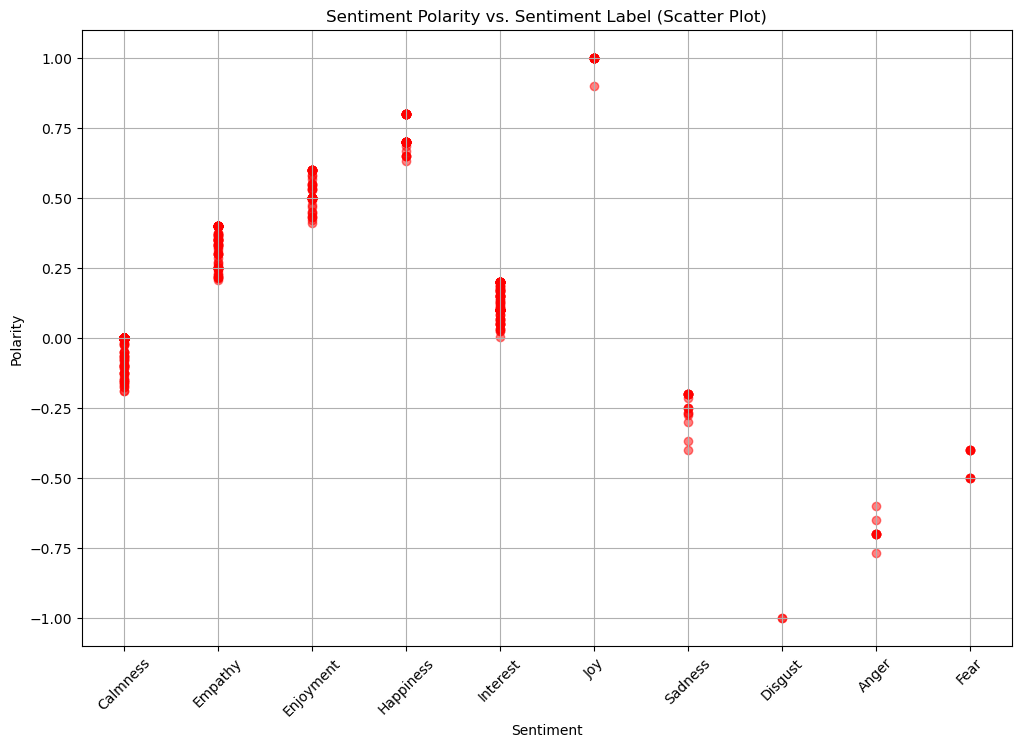

In [17]:
sentiment_map = {sentiment: idx for idx, sentiment in enumerate(data['Sentiment_Label'].unique())}
data['Sentiment_Numeric'] = data['Sentiment_Label'].map(sentiment_map)

# Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(data['Sentiment_Numeric'], data['Sentiment_Polarity'], alpha=0.5, color='red')
plt.title('Sentiment Polarity vs. Sentiment Label (Scatter Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Polarity')
plt.xticks(ticks=range(len(sentiment_map)), labels=sentiment_map.keys(), rotation=45)
plt.grid(True)
plt.show()